# <center>Linear Discriminant Analysis </center>

### Import Libraries

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### Load the dataset

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
target_names = iris.target_names

In [ ]:
X.shape

(150, 4)

### Plotting in 3-d

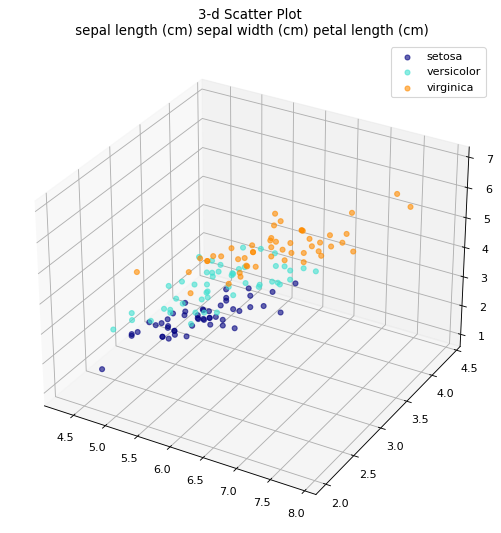

In [ ]:
colors = ['navy', 'turquoise', 'darkorange']
fig = plt.figure(figsize=(8,8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
feature_ls = [0,1,2]   ## feature list

for color, i, target_name in zip(colors, [0,1,2], target_names):
    ax.scatter(X[y == i, feature_ls[0]], X[y == i, feature_ls[1]], X[y == i, feature_ls[2]], alpha=0.6, color=color, label=target_name)

plt.title('3-d Scatter Plot\n {} {} {}'.format(features[feature_ls[0]],features[feature_ls[1]],features[feature_ls[2]]))
plt.legend()
plt.show()

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=25)

In [ ]:
X_train.shape , X_test.shape

((75, 4), (75, 4))

In [ ]:
count0=0;count1=0;count2=0
for i in y_test:
    if i == 0:
        count0 +=1
    if i == 1:
        count1 +=1
    if i == 2:
        count2 +=1
print(count0,count1,count2)

25 25 25


### KNN classification on Original data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)
print("The accuracy of KNN on the original dataset: {}".format(acc))

The accuracy of KNN on the original dataset: 0.9733333333333334


### Reduce dimension to 2-d using LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda2 = LinearDiscriminantAnalysis(n_components=2)   ## reducing dimensions to 2-d
lda2.fit(X_train, y_train)

X_train_mod = lda2.transform(X_train)
X_test_mod = lda2.transform(X_test)
print("Train Set:{} Test Set:{}".format(X_train_mod.shape, X_test_mod.shape))

Train Set:(75, 2) Test Set:(75, 2)


### KNN classification modified 2-d data

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_mod, y_train)
acc = knn.score(X_test_mod, y_test)
print("The accuracy of KNN on the modified 2-d dataset: {}".format(acc))

The accuracy of KNN on the modified 2-d dataset: 0.9466666666666667


In [ ]:
X_test_mod.shape

(75, 2)

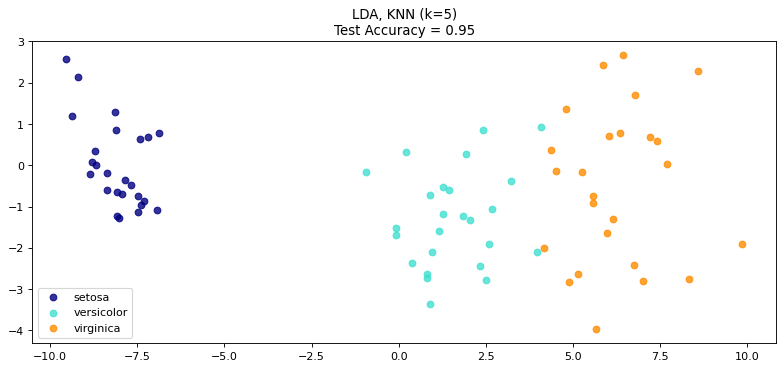

In [ ]:
plt.figure(figsize=(12,5), dpi=80)
for color,i,target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(X_test_mod[y_test==i,0], X_test_mod[y_test==i,1], color=color, alpha=0.8, label=target_name)
plt.legend(loc='best')
plt.title("LDA, KNN (k=5)\nTest Accuracy = {:.2f}".format(acc))
plt.show()

### KNN classification modified 1-d data

In [ ]:
lda1 = LinearDiscriminantAnalysis(n_components=1)   ## reducing dimensions to 2-d
lda1.fit(X_train, y_train)

X_train_mod = lda1.transform(X_train)
X_test_mod = lda1.transform(X_test)
print("Train Set:{} Test Set:{}".format(X_train_mod.shape, X_test_mod.shape))

Train Set:(75, 1) Test Set:(75, 1)


### KNN classification modified 1-d data

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_mod, y_train)
acc = knn.score(X_test_mod, y_test)
print("The accuracy of KNN on the modified 1-d dataset: {}".format(acc))

The accuracy of KNN on the modified 1-d dataset: 0.9733333333333334


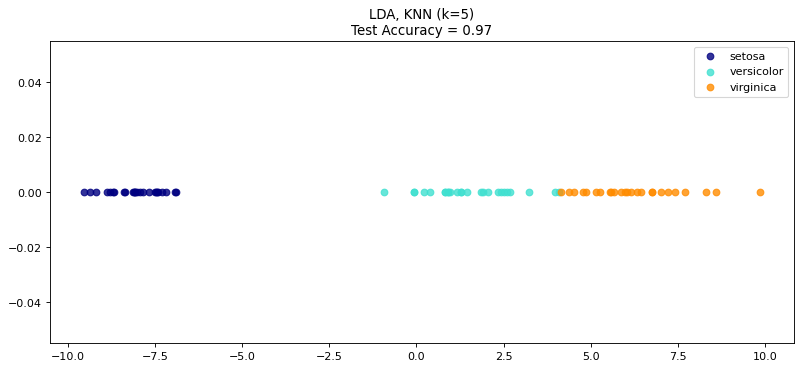

In [ ]:
plt.figure(figsize=(12,5), dpi=80)
for color,i,target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(X_test_mod[y_test==i, 0], np.zeros_like(X_test_mod[y_test==i, 0]), color=color, alpha=0.8, label=target_name)
plt.legend(loc='best')
plt.title("LDA, KNN (k=5)\nTest Accuracy = {:.2f}".format(acc))
plt.show()